# Testing our neural models from chapter 7

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Создадим словарь, определяющий элементы одежды:

labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

## Большая модель (Big model)

Большую модель мы обучали на картинках размером 299х299 пикселей

In [4]:
image_size = (299, 299)

In [5]:
# Загружаем модель с наилучшим показателем достоверности

model = keras.models.load_model('xception_v4_large_04_0.880.keras')

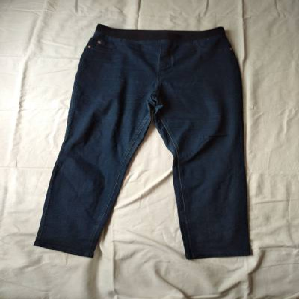

In [6]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

Препроцессинг изображения:

In [7]:
x = np.array(img)  # приведение изображения к массиву Numpy
X = np.array([x])  # Создание батча изображений
X = preprocess_input(X) # Нормализация изображения

Делаем предсказание:

In [8]:
pred = model.predict(X)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


array([-1.4242435 , -2.9578526 , -0.5467918 , -0.8243229 ,  9.819857  ,
       -0.33323118, -4.045676  ,  5.1960325 , -1.8986888 , -2.3432417 ],
      dtype=float32)

In [9]:
pred[0].argmax()

4

Конвертируем с помощью словарика, который мы задали в начале блокнота

In [10]:
labels[pred[0].argmax()]

'pants'

Теперь применим модель ко всему датасету:

- сначала создадим генератор
- затем используем функцию evaluate для получения accuracy

In [11]:

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [12]:
model.evaluate(test_ds)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8831 - loss: 0.3433


[0.25952795147895813, 0.9059139490127563]

Модель на тестовых данных показала улучшенный показатель accuracy по сравнению с валидационным множеством. 90% против 88%

## Малая модель (Small model)

In [13]:
model = keras.models.load_model('xception_v3_05_0.824.keras')

In [14]:
image_size = (150, 150)

In [15]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [16]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 410ms/step - accuracy: 0.7363 - loss: 0.6732


[0.5200425982475281, 0.8118279576301575]

Малая модель на тестовом множестве показала себя менее результативно по сравнению с валидационным множеством (82,4% против 81,1%)